# Data Management: Merge Bike and Event Datasets

## This notebook:
1. Merge the two datasets
2. Returns a csv with Citi Bike trips associating with the event happening on the same day ('merged_event_CB2016_800m.csv')

## Clean before merge

In [14]:
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Yuwen/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
event = pd.read_csv('events_2016_subset.csv')
event.head(1)

Unnamed: 0       EventID  Event_type                  Name  \
0           1  1.490000e+15  basketball  Harlem Globetrotters   

            Start_Time  Start_Hour             End_Time  End_Hour  weekday  
0  2016-01-02 19:00:00          19  2016-01-02 21:00:00        21    False

In [18]:
bike = pd.read_csv('CB2016_subset_800m_16h.csv')
bike.head(1)

Unnamed: 0  tripduration starttime  stoptime  start station id  \
0           0           173  16:03:10  16:06:03               243   

        start station name  start station latitude  start station longitude  \
0  Fulton St & Rockwell Pl               40.688226               -73.979382   

   end station id             end station name  end station latitude  \
0             241  DeKalb Ave & S Portland Ave              40.68981   

   end station longitude  bikeid    usertype  birth year  gender   startdate  \
0             -73.974931   23976  Subscriber      1971.0       2  2016-01-01   

     stopdate  
0  2016-01-01

In [19]:
len(event), len(bike)

(135, 60148)

In [20]:
event['Date'] = pd.to_datetime(event['Start_Time']).dt.date
event.head(1)

Unnamed: 0       EventID  Event_type                  Name  \
0           1  1.490000e+15  basketball  Harlem Globetrotters   

            Start_Time  Start_Hour             End_Time  End_Hour  weekday  \
0  2016-01-02 19:00:00          19  2016-01-02 21:00:00        21    False   

         Date  
0  2016-01-02

In [21]:
e = event[['Date','Event_type','End_Time']]
e.head(1)

Date  Event_type             End_Time
0  2016-01-02  basketball  2016-01-02 21:00:00

In [22]:
e.Date = pd.to_datetime(e.Date)
bike.startdate = pd.to_datetime(bike.startdate)

/Users/Yuwen/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Examine end time distribution

In [23]:
t = pd.to_datetime(event['End_Time']).dt.hour + pd.to_datetime(event['End_Time']).dt.minute / 60
tt = pd.DataFrame(t)
tt.head()

End_Time
0      21.0
1      21.5
2      21.5
3      21.5
4      21.5

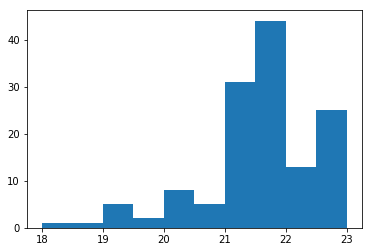

In [24]:
pl.hist(tt.End_Time)
pl.savefig('fig_EndTimeDistribution.png', dpi=300)

## Merge datasets

In [28]:
joined = bike.merge(e,left_on='startdate',right_on='Date',how='left')
joined.head(1)

Unnamed: 0  tripduration starttime  stoptime  start station id  \
0           0           173  16:03:10  16:06:03               243   

        start station name  start station latitude  start station longitude  \
0  Fulton St & Rockwell Pl               40.688226               -73.979382   

   end station id             end station name   ...     \
0             241  DeKalb Ave & S Portland Ave   ...      

   end station longitude  bikeid    usertype birth year  gender  startdate  \
0             -73.974931   23976  Subscriber     1971.0       2 2016-01-01   

     stopdate Date Event_type End_Time  
0  2016-01-01  NaT        NaN      NaN  

[1 rows x 21 columns]

In [29]:
len(bike),len(joined)

(60148, 60522)

In [27]:
joined.keys()

Index(['Unnamed: 0', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'startdate', 'stopdate', 'Date', 'Event_type',
       'End_Time'],
      dtype='object')

In [31]:
joined.drop([u'Unnamed: 0', 
             u'Date'],axis=1,inplace=True)
joined.head(1)

tripduration starttime  stoptime  start station id  \
0           173  16:03:10  16:06:03               243   

        start station name  start station latitude  start station longitude  \
0  Fulton St & Rockwell Pl               40.688226               -73.979382   

   end station id             end station name  end station latitude  \
0             241  DeKalb Ave & S Portland Ave              40.68981   

   end station longitude  bikeid    usertype  birth year  gender  startdate  \
0             -73.974931   23976  Subscriber      1971.0       2 2016-01-01   

     stopdate Event_type End_Time  
0  2016-01-01        NaN      NaN

In [ ]:
# assign psuedo-end time for days w/o events
for i in joined[joined.End_Time.isnull()].index:
    joined.loc[i,'End_Time'] = pd.to_datetime("21:00:00")
joined.head(1)

In [ ]:
joined['E_Time'] = pd.to_datetime(joined['End_Time']).dt.time
joined.head(1)

In [265]:
joined.to_csv('merged_event_CB2016_800m.csv')